użytkowanie:

-losowanie liczb w zadanym przedziale [a:b], aby stworzyć liczby
ujemne ustawić neg na wartość, która będzie odejmowana

# function random_array(count=100, a=0, b=0, neg=0)
-zwraca tablicę z [x1, x2]*n elementami x1, x2, s ustawia sortowanie

# function multiply(x1, x2, n, s=0)
-funkcja pomocnicza do tworzenia danych do wykresu

# function plot_ex(n, ex, input)
-funkcja testująca 3 algorytmy, expectex_res do wyliczania błędu, ret jeśli nie drukujemy tylko zwracamy 3 elementową tablicę

# function test(input_arr, expected_res=0, ret=false)
-funkcja do obliczania kolejnych wyrazów ciągu podanego wzorem f

# function Eq_Array(n, f)
-funkcja wylicza kolejne wyrazy ciągu arytmetycznego

# function arithm(a1, r, n)
-funkcja zwraca tablicę wartości bezwzględnych z podanej tablicy 
# function abs_a(x)

sum_naive(x)  - sumuje podaną tablicę

sum_binary(x) --||--

sum_kahan(x)  --||--

reszta używanych funkcji/zmiennych jest w poniższym pliku

<center>
    <h1> Pracownia z analizy numerycznej </h1>
    <h3> Testowanie algorytmów do zadania <b>P1.3</b></h3>
</center>

<br>
<p>
   Do przetestowania sumy $\sum_{i=0}^{n} a_n$ użyjemy następujących algorytmów:
   <ul>
       <li>Sumowanie naiwne</li>
       <li>Sumowanie binarne</li>
       <li>Sumowanie metodą Kahana</li>
   </ul>
</p>


In [366]:
include("program.jl")


arithm (generic function with 1 method)

In [117]:
setprecision(32) #precyzja 32 bitowa
numbers = random_array(100000, -100, 100) # 100000 losowych liczb takich że -100 <= n <= 100
sn = sum_naive(numbers)
sb = sum_binary(numbers)
sk = sum_kahan(numbers)
@printf("%.16f\n",sn)
@printf("%.16f\n",sb)
@printf("%.16f\n",sk)

9342.0548896789550781
9342.0543518066406250
9342.0543541778442886


In [118]:
@printf("różnica po posortowaniu rosnącym:\n")
@printf("%e\n",abs(sum_naive(sort(numbers))- sn))
@printf("%e\n",abs(sum_binary(sort(numbers)) - sb))
@printf("%e\n",abs(sum_kahan(sort(numbers)) - sk))
@printf("różnica po posortowaniu malejącym:\n")
@printf("%e\n",abs(sum_naive(sort(numbers, rev=true))- sn))
@printf("%e\n",abs(sum_binary(sort(numbers, rev=true)) - sb))
@printf("%e\n",abs(sum_kahan(sort(numbers, rev=true)) - sk))

różnica po posortowaniu rosnącym:
1.275978e-01
3.356934e-04
0.000000e+00
różnica po posortowaniu malejącym:
1.206055e-01
3.356934e-04
0.000000e+00


 <p>Do tego funkcja losująca liczby</p>

In [119]:
setprecision(64)
sn = sum_naive(numbers)
sb = sum_binary(numbers)
sk = sum_kahan(numbers)
@printf("%.16f\n",sn)
@printf("%.16f\n",sb)
@printf("%.16f\n",sk)
@printf("różnica po posortowaniu rosnącym:\n")
@printf("%e\n",abs(sum_naive(sort(numbers))- sn))
@printf("%e\n",abs(sum_binary(sort(numbers)) - sb))
@printf("%e\n",abs(sum_kahan(sort(numbers)) - sk))
@printf("różnica po posortowaniu malejącym:\n")
@printf("%e\n",abs(sum_naive(sort(numbers, rev=true))- sn))
@printf("%e\n",abs(sum_binary(sort(numbers, rev=true)) - sb))
@printf("%e\n",abs(sum_kahan(sort(numbers, rev=true)) - sk))

9342.0543541778441039
9342.0543541778425691
9342.0543541778442886
różnica po posortowaniu rosnącym:
7.545964e-12
1.719513e-12
0.000000e+00
różnica po posortowaniu malejącym:
2.100364e-11
8.100187e-13
0.000000e+00


test dla $\sum_{n=0}^{\infty}\frac{1}{n} = \infty$

In [150]:
setprecision(32)
f1(n) = BigFloat(1/BigFloat(n))
f1_32 = test(Eq_Array(131072, f1), 0, true) #wiecej = lepiej
setprecision(64) 
f1_64 = test(Eq_Array(131072, f1), 0, true)
println(f1_32)
println(f1_64)
println(abs_a(f1_64 -f1_32))

BigFloat[1.2360721454e+01, 1.2360721558e+01, 1.2360721551e+01]
BigFloat[1.23607215491130180175e+01, 1.23607215491130181086e+01, 1.23607215491130181077e+01]
BigFloat[9.50887031371527857715e-08, 9.21942512870782548973e-09, 1.76884453265135910272e-09]


$\sum_{n=0}^{\infty}\frac{z^n}{n!} = e^z$

In [170]:
setprecision(32)
z = 1
f2(n) = BigFloat(BigFloat(z^n)/BigFloat(factorial(n)))
f2_32 = test(Eq_Array(16, f2), e^z, true)
setprecision(64) 
f2_64 = test(Eq_Array(16, f2), e^z, true)
println(f2_32)
println(f2_64)
println(abs_a(f2_64 -f2_32))

BigFloat[1.2706311558e-09, 3.3930858123e-10, 3.3930858123e-10]
BigFloat[5.06263867633416353442e-14, 5.06263867633416353442e-14, 5.06266036037761324451e-14]
BigFloat[1.27058052946070476619e-09, 3.39257954845226250562e-10, 3.39257954628385816065e-10]


$\sum_{n=0}^{\infty}k\frac{z^n}{n!} =ze^z$

In [172]:
setprecision(32)
z = 1
f2(n) = n*(BigFloat(BigFloat(z^n)/BigFloat(factorial(n))))
f2_32 = test(Eq_Array(16, f2), z*e^z, true)
setprecision(64) 
f2_64 = test(Eq_Array(16, f2), z*e^z, true)
println(f2_32)
println(f2_64)
println(abs_a(f2_64 -f2_32))

BigFloat[1.2706311558e-09, 3.3930858123e-10, 3.3930858123e-10]
BigFloat[8.15342801954721529967e-13, 8.15342801954721529967e-13, 8.15342801954721529967e-13]
BigFloat[1.26981581304551338629e-09, 3.38493238430034870667e-10, 3.38493238430034870667e-10]


$\sum_{n=0}^{\infty}\frac{(-1)^{n}z^{2n+1}}{(2n + 1)!} = sin z$

In [175]:
setprecision(32)
z = 2
f3(n) = ((-1)^n * BigFloat(z^(2*n+1))) / (BigFloat(factorial(2*n + 1)))
f3_32 = test(Eq_Array(8, f3), sin(z), true)
setprecision(64) 
f3_64 = test(Eq_Array(8, f3), sin(z), true)
println(f3_32)
println(f3_64)
println(abs_a(f3_64 -f3_32))

BigFloat[5.9447624601e-10, 3.6164560235e-10, 3.6164560235e-10]
BigFloat[3.64234083974519784466e-10, 3.64234083974519784466e-10, 3.64234083974519784466e-10]
BigFloat[2.30242162032982811137e-10, 2.58848162088681776893e-12, 2.58848162088681776893e-12]


In [318]:
setprecision(128)
a1 = 10000; r = 1/1000000; n = 2^8; 
exact(n) = BigFloat((a1 + a1 + BigFloat((n - 1)*r))/2 * n)
exact_arr = [BigFloat(0.0)]
pop!(exact_arr)
function gen_exact_arr!(arr) 
    i = 1
    while i <= n
        push!(arr, exact(i))
        i *= 2
    end
end
gen_exact_arr!(exact_arr)
println(exact(n))
setprecision(512)
println(sum_kahan(arithm(a1,r,n)))

2.560000032639999999999995405897124101102e+06
2.56000003264001104980707168579101562500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000e+06


3.264000e-02
4.134375e-04
4.134375e-04
64bit
1.104981e-08
1.104981e-08
1.104981e-08
BigFloat[3.26399889550963370755e-02, 4.13426450207803053427e-04, 4.13426450207803053427e-04]



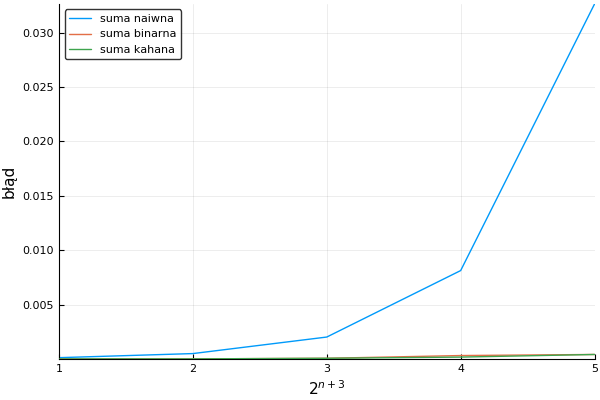

In [319]:
setprecision(32)
f_32 = test(arithm(a1, r, n), exact_arr[Int(log2(n)+1)], true)
setprecision(64) 
f_64 = test(arithm(a1, r, n), exact_arr[Int(log2(n)+1)], true)

@printf("%e\n",f_32[1])
@printf("%e\n",f_32[2])
@printf("%e\n",f_32[3])
@printf("64bit\n%e\n",f_64[1])
@printf("%e\n",f_64[2])
@printf("%e\n",f_64[3])
println(abs_a(f_64 -f_32))


setprecision(32)
arr = plot_ex(n, exact_arr, arithm(a1,r,n))
using Plots
pyplot()
plot(arr[1], label="suma naiwna", xlabel="\$2^{n+3}\$", ylabel="błąd")
plot!(arr[2], label="suma binarna")
plot!(arr[3], label="suma kahana")


In [81]:
setprecision(128)
n = 2^18
exact_arr = [BigFloat(0.0)]
pop!(exact_arr)
gen_exact_arr!(exact_arr)
setprecision(64) 
f_64 = test(arithm(a1, r, n), exact_arr[Int(log2(n)+1)], true)
println(f_64)
println(abs_a([f_64[3] - f_64[1], f_64[3] - f_64[2]]))

BigFloat[1.16328704170882701874e-02, 1.16319656372070312500e-02, 1.16319656372070312500e-02]
BigFloat[9.0477988123893737793e-07, 0.00000000000000000000]


In [94]:
setprecision(128)
a1 = 100000000; r = 1/1000000000000; n = 2^18; 
exact_arr = [BigFloat(0.0)]
pop!(exact_arr)
gen_exact_arr!(exact_arr)


setprecision(32)
f_32 = test(arithm(a1, r, n), exact_arr[Int(log2(n)+1)], true)
setprecision(64) 
f_64 = test(arithm(a1, r, n), exact_arr[Int(log2(n)+1)], true)

println(f_32)
println(f_64)
println(abs_a(f_64 -f_32))
# test czy we float 64 da sie osiagnac wiecej - udalo sie blad rzedu 2^-2

BigFloat[6.4290816031e+07, 3.5156250000e-02, 3.5156250000e-02]
BigFloat[3.51562500000000000000e-02, 3.51562500000000000000e-02, 3.51562500000000000000e-02]
BigFloat[6.42908159960937500000e+07, 0.00000000000000000000, 0.00000000000000000000]


BigFloat[8.2560000000e+03, 0.0000000000, 0.0000000000]
BigFloat[0.00000000000000000000, 0.00000000000000000000, 0.00000000000000000000]
BigFloat[8.25600000000000000000e+03, 0.00000000000000000000, 0.00000000000000000000]



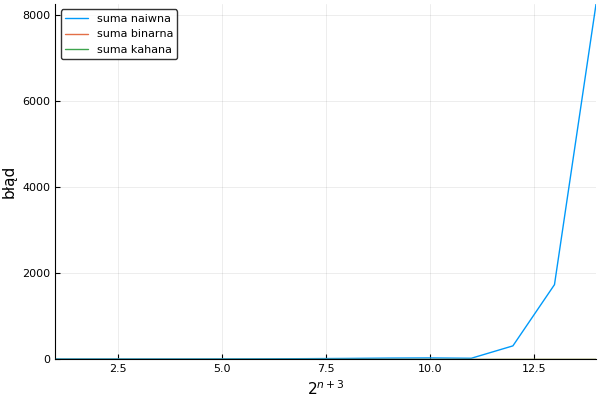

In [337]:
setprecision(128)
a1 = 1000000; r = 1/64; n = 2^17
exact_arr = [BigFloat(0.0)]
pop!(exact_arr)
gen_exact_arr!(exact_arr)


setprecision(32)
f_32 = test(arithm(a1, r, n), exact_arr[Int(log2(n)+1)], true)
setprecision(64) 
f_64 = test(arithm(a1, r, n), exact_arr[Int(log2(n)+1)], true)

println(f_32)
println(f_64)
println(abs_a(f_64 -f_32))

setprecision(32)
arr = plot_ex(n, exact_arr, arithm(a1,r,n))
using Plots
pyplot()
plot(arr[1], label="suma naiwna", xlabel="\$2^{n+3}\$", ylabel="błąd")
plot!(arr[2], label="suma binarna")
plot!(arr[3], label="suma kahana")

In [126]:
setprecision(128)
a1 = 100000; r = 1/9; n = 2^16
exact_arr = [BigFloat(0.0)]
pop!(exact_arr)
gen_exact_arr!(exact_arr)


setprecision(32)
f_32 = test(arithm(a1, r, n), exact_arr[Int(log2(n)+1)], true)
setprecision(64) 
f_64 = test(arithm(a1, r, n), exact_arr[Int(log2(n)+1)], true)

println(f_32)
println(f_64)
println(abs_a(f_64 -f_32))
#test dla 1/9

BigFloat[1.309333333e+03, 1.3333330154, 6.6666698456e-01]
BigFloat[3.47139406949281692505e-03, 3.47185134887695312500e-03, 3.47185134887695312500e-03]
BigFloat[1.30932986162137240171e+03, 1.32986116409301757812, 6.63195133209228515625e-01]


In [186]:
numbers  = random_array(2^15, 0, 100000)
numbers2 = random_array(2^15)
setprecision(128)
res = append!(numbers2, numbers)
err = sum_kahan(res)

setprecision(32)
sn = sum_naive(res)
sb = sum_binary(res)
sk = sum_kahan(res)
@printf("%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))
sn = sum_naive(sort(res, rev=true))
sb = sum_binary(sort(res,rev=true))
sk = sum_kahan(sort(res,rev=true))
@printf("\n%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))

setprecision(64)
sn = sum_naive(res)
sb = sum_binary(res)
sk = sum_kahan(res)
@printf("64bit\n%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))
sn = sum_naive(sort(res, rev=true))
sb = sum_binary(sort(res,rev=true))
sk = sum_kahan(sort(res,rev=true))
@printf("\n%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))

8.816094e+00
8.160944e-01
0.000000e+00

1.839056e-01
8.160944e-01
0.000000e+00
64bit
1.527369e-07
1.441222e-07
0.000000e+00

1.413282e-07
1.429580e-07
0.000000e+00


In [340]:
numbers  = random_array(2^18-1)
setprecision(128)
res = append!([Float64(10000000000.0)], numbers)
err = sum_kahan(res)

@printf("exact:\n%e\n\n",err)

setprecision(32)
sn = sum_naive(res)
sb = sum_binary(res)
sk = sum_kahan(res)

@printf("%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))

sn = sum_naive(sort(res, rev=false))
sb = sum_binary(sort(res,rev=false))
sk = sum_kahan(sort(res,rev=false))
@printf("\n%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))

sn = sum_naive(sort(res, rev=true))
sb = sum_binary(sort(res,rev=true))
sk = sum_kahan(sort(res,rev=true))
@printf("\n%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))

setprecision(64)
sn = sum_naive(res)
sb = sum_binary(res)
sk = sum_kahan(res)
@printf("64bit\n%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))

sn = sum_naive(sort(res, rev=true))
sb = sum_binary(sort(res,rev=true))
sk = sum_kahan(sort(res,rev=true))
@printf("\n%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))


exact:
1.000013e+10

1.308078e+05
3.759792e+00
0.000000e+00

2.402077e-01
4.240208e+00
0.000000e+00

1.308078e+05
4.240208e+00
0.000000e+00
64bit
1.033768e-07
6.146729e-07
0.000000e+00

1.033768e-07
7.376075e-07
0.000000e+00


In [234]:
arr = multiply(100000000,1/(3^7), 2^17)
setprecision(128)
err = sum_kahan(arr)

setprecision(32)
sn = sum_naive(arr)
sb = sum_binary(arr)
sk = sum_kahan(arr)

@printf("%e\n",abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))

sn = sum_naive(sort(arr,rev=false))
sb = sum_binary(sort(arr,rev=false))
sk = sum_kahan(sort(arr,rev=false))


@printf("\n\n%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))

setprecision(64)

sn = sum_naive(arr)
sb = sum_binary(arr)
sk = sum_kahan(arr)

@printf("64bit\n%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))

3.073644e+07
5.993164e+01
0.000000e+00


3.073644e+07
5.993164e+01
0.000000e+00
64bit
1.522255e-02
0.000000e+00
0.000000e+00


In [689]:
numbers  = random_array(2^16,1,100, 2)
numbersa = [Float64(0.0)]
pop!(numbersa)
for i in numbers
    push!(numbersa, abs(i))
end    
setprecision(256)
err = sum_kahan(numbers)
println(sum_kahan(abs_a(numbersa))/abs(err))
setprecision(32)
sn = sum_naive(numbers)
sb = sum_binary(numbers)
sk = sum_kahan(numbers)
@printf("%e\n", abs(sn - err))
@printf("%e\n",abs(sb - err))
@printf("%e\n",abs(sk - err))

#=
4.153169892563103
373.77723662652926
2.269599e-08
7.106337e-09
0.000000e+00
=#

1.0001979202649829
6.239437e-02
1.056283e-04
0.000000e+00
